In [ ]:
!pip install mplsoccer
from mplsoccer import Radar, FontManager
import matplotlib.pyplot as plt

from mplsoccer import PyPizza, add_image, FontManager


from matplotlib.offsetbox import OffsetImage, AnnotationBbox


from PIL import Image
from io import BytesIO
import requests

In [2]:
# parameter names of the statistics we want to show
params = ["npxG", "Non-Penalty Goals", "xA", "Key Passes", "Through Balls",
          "Progressive Passes", "Shot-Creating Actions", "Goal-Creating Actions",
          "Dribbles Completed", "Pressure Regains", "Touches In Box"]

# The lower and upper boundaries for the statistics
low =  [0.08, 0.0, 0.1, 1, 0.6,  4, 3, 0.3, 0.3, 2.0, 2]
high = [0.37, 0.6, 0.6, 4, 1.2, 10, 8, 1.3, 1.5, 5.5, 5]

In [3]:
radar = Radar(params, low, high,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*11,
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

In [4]:
URL1 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-Regular.ttf?raw=true')
serif_regular = FontManager(URL1)
URL2 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-ExtraLight.ttf?raw=true')
serif_extra_light = FontManager(URL2)
URL3 = ('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf?raw=true')
rubik_regular = FontManager(URL3)
URL4 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Thin.ttf?raw=true'
robotto_thin = FontManager(URL4)
URL5 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Regular.ttf?raw=true'
robotto_regular = FontManager(URL5)
URL6 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Bold.ttf?raw=true'
robotto_bold = FontManager(URL6)

In [6]:
taa_values =  [0.25, 0.42, 0.42, 3.47, 1.04, 8.06, 5.62, 0.97, 0.56, 5.14, 3.54]
cancelo_values = [0.32, 0.00, 0.43, 3.50, 0.98, 7.72, 6.18, 0.98, 1.71, 4.88, 4.96]

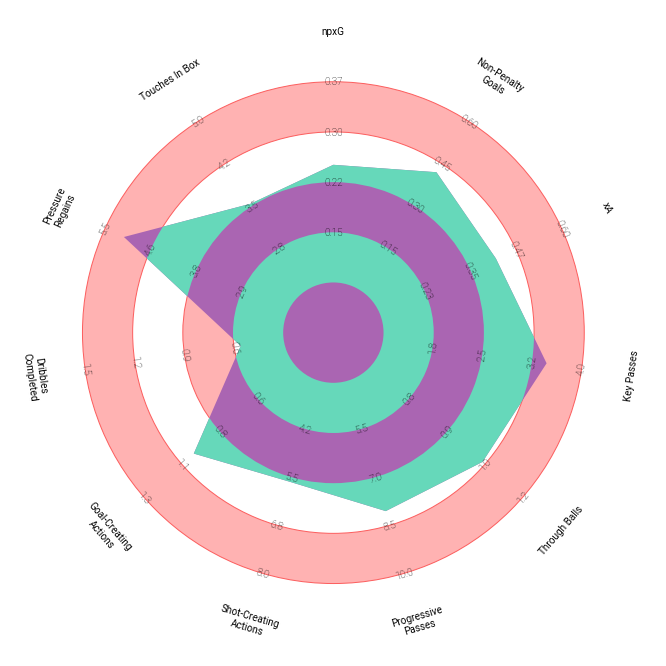

In [7]:
# radar só para um dos jogadores
fig, ax = radar.setup_axis()  # format axis as a radar
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')  # draw circles
radar_output = radar.draw_radar(taa_values, ax=ax,
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#66d8ba'})  # draw the radar
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)  # draw the range labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_regular.prop)  # draw the param labels

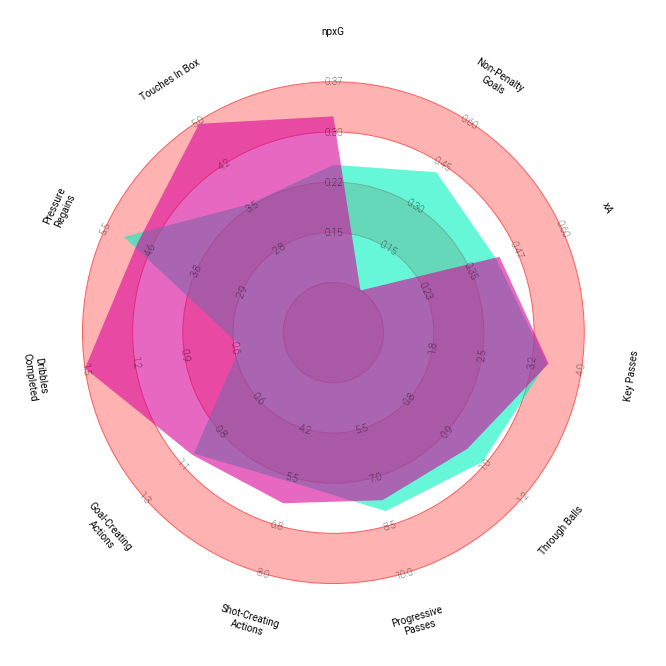

In [8]:
# simples comparação

# plot radar
fig, ax = radar.setup_axis()
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')
radar_output = radar.draw_radar_compare(taa_values,cancelo_values, ax=ax,
                                        kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_regular.prop)



In [ ]:
!pip install highlight_text
import matplotlib.pyplot as plt
from highlight_text import fig_text
!pip install mplsoccer
from mplsoccer import PyPizza, FontManager

font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true"))


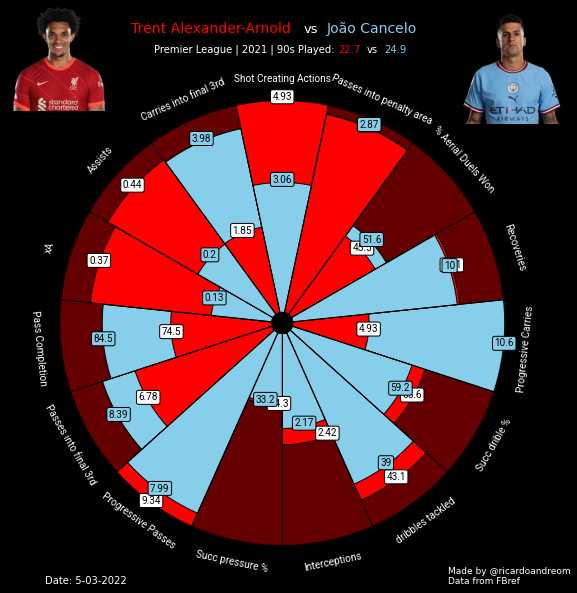

In [25]:
#### pizza comparativo laterais 

# parameter and values list
params = [
    "Shot Creating Actions", "Passes into penalty area", "% Aerial Duels Won", "Recoveries",
    "Progressive Carries", "Succ drible %", "dribbles tackled", "Interceptions",
    "Succ pressure %", "Progressive Passes","Passes into final 3rd","Pass Completion","xA","Assists","Carries into final 3rd"
]
values = [4.93,2.86,45.5,10.1,4.93,65.6,43.1,2.42,34.3,9.34,6.78,74.5,0.37,0.44,1.85]    # player 1
values_2 = [3.06,2.87,51.6,10,10.6,59.2,39,2.17,33.2,7.99,8.39,84.5,0.13,0.20,3.98]  # player 2

# minimum range value and maximum range value for parameters
min_range = [0.56,0,0,3,2.03,0,0,0.72,0,1.40,0,59.8,0.01,0,0]
max_range = [4.65,3,100,12,10.12,100,50,3.97,100,8.49,10,90.8,0.43,0.49,4.5]

# pass True in that parameter-index whose values are to be adjusted
# here True values are passed for "Pressure Regains", "pAdj Tackles" params
params_offset = [
    False, False, False, False, False,
    False, False, True, True, False,False, False, False, False, False
]

# instantiate PyPizza class
baker = PyPizza(
    params=params,
    min_range=min_range,        # min range values
    max_range=max_range,        # max range values
    background_color="black", straight_line_color="#000000",
    last_circle_color="#000000", last_circle_lw=2.5, other_circle_lw=0,
    other_circle_color="black", straight_line_lw=1
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                     # list of values
    compare_values=values_2,    # passing comparison values
    figsize=(8,9),             # adjust figsize according to your need
    color_blank_space="same",   # use same color to fill blank space
    blank_alpha=0.4,            # alpha for blank-space colors
    param_location=110,         # where the parameters will be added
    kwargs_slices=dict(
        facecolor="red", edgecolor="#000000",
        zorder=1, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_compare=dict(
        facecolor="skyblue", edgecolor="black", zorder=3, linewidth=1,
    ),                          # values to be used when plotting comparison slices
    kwargs_params=dict(
        color="white", fontsize=12, zorder=5,
        fontproperties=font_normal.prop, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="white",
            boxstyle="round,pad=0.2", lw=1
        )
    ),                           # values to be used when adding parameter-values
    kwargs_compare_values=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="skyblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                            # values to be used when adding comparison-values
)

fig.text(.25,.95,'Trent Alexander-Arnold',size=14,color="red")
fig.text(.55,.95,'vs',size=13,color="white")
fig.text(.59,.95,'João Cancelo',size=14,color="skyblue")
fig.text(.29,.92,'Premier League | 2021 | 90s Played:',size = 10, color ="white")
fig.text(.61,.92,'22.7',size = 10, color ="red")
fig.text(.66,.92,'vs',size=10,color="white")
fig.text(.69,.92,'24.9',size = 10, color ="skyblue")
fig.text(.8,0.1,'Made by @ricardoandreom\nData from FBref',size=9, color = "white")
fig.text(.1,0.1,'Date: 5-03-2022',size= 10, color = "white")
baker.adjust_texts(params_offset, offset=-0.17)
ax2 = fig.add_axes([.0,.83,.25,.16])
ax2.axis('off')
img = Image.open('taa.png')
ax2.imshow(img)
ax3 = fig.add_axes([.78,.81,.26,.17])
ax3.axis('off')
img = Image.open('cancelo.png')
ax3.imshow(img)
plt.savefig('compfullbacks.png',dpi=600,bbox_inches = 'tight',facecolor='black')
plt.show()